We define the parameters which we will use

In [44]:
import numpy as np
import time
import random
from progressbar import ProgressBar
import matplotlib.pyplot as plt

In [72]:
N = 1000
l = L = 1000
S = 217575
vmin = (0.5 + 0.02*S%21)
vmax = (3 + 0.2*S%11)
Ts =  86400

#### Assumptions 
Apply the same configurations as done in the book in example 6.5. Meaning that we use the stochastic recurrence.

In [130]:
pbar = ProgressBar(maxval=N)

In [120]:
def simulate_waypoint():
    pbar = ProgressBar()

    state_variable_list = []
    ## sample a point uniformily from a square
    x,y = random.randint(0,l-1), random.randint(0,L-1)
    v0 = random.uniform(vmin, vmax)

    V = v0
    T = 0
    M = np.array([np.array([x,y])])
    waypoints = []
    prev = 0;
    
    T_list = [T]
    V_list = [V]
    
    while(T < Ts):

        x,y = random.randint(0,l-1), random.randint(0,L-1)
        m = np.array([x,y])

        t = T + np.linalg.norm(m-M[prev])/V

        v = random.uniform(vmin, vmax)
        T = t
        V = v
        prev = prev + 1
        M = np.append(M,np.array([[x,y]]), axis=0)
 
        T_list.append(T)
        V_list.append(V)

    waypoints.append(len(M))
    
    
    return M,T_list, V_list

M,T,V = simulate_waypoint()

### Retrieve all points, times, and velocities of all users

In [131]:
M = []
T = []
V = []
for i in pbar(range(N)):
    m,t,v = simulate_waypoint()
    M.append(m)
    T.append(t)
    V.append(v)

100% |########################################################################|


In [140]:
waypoints = [len(m)for m in M]
print(np.mean(waypoints))
print(np.min(waypoints))
print(np.max(waypoints))

1388.267
1320
1459


## Plot boxplot

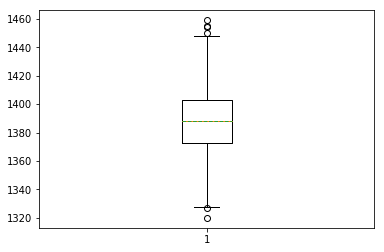

In [149]:
boxplot_of_wayPoints = plt.boxplot(waypoints, showmeans= True, meanline=True)

plt.savefig('q2_box.png')

## Plot waypoints

In [233]:
def plot_waypoint(users, points_to_plot):
    color = points_to_plot*['white']
    color[0] = 'black'

    for i in range(users):
        x,y = M[i][:points_to_plot,0], M[i][:points_to_plot,1]
        plt.scatter(x,y, c=color, marker='.',)
        plt.plot(x, y, linewidth=0.5)
        
    plt.savefig(str(users)+"users"+str(points_to_plot)+"plotted_points.png")
    plt.show()
    
    

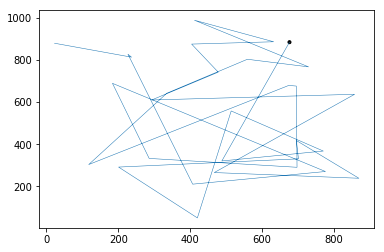

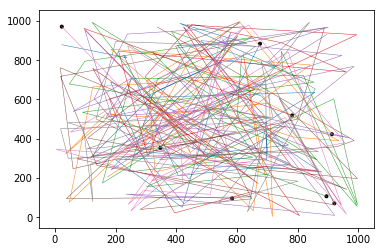

In [235]:
plot_waypoint(1, 30)
plot_waypoint(8, 30)